In [1]:
# First some imports that we'll use below
from __future__ import print_function
import treecorr
import fitsio
import numpy
import math
import time
import pprint
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
from scipy import stats
import plotly.plotly as py
import plotly.graph_objs as go
from astropy.table import Table
from scipy.stats import chisquare

In [2]:
def chi2(num):
    chisquare = []
    for i in range (0, len(xi_value[num])):
        xival =  (xi_value[num][i])
        yval = (yfit_eq[num][i])
        sigval = (sig_value[num][i])
        ndof = len(xi_value[num]) - 2
        if (sigval !=0 ):
            chi = math.pow(yval - xival, 2)/ math.pow(sigval, 2)
            chi_ndof = chi/ndof
            chisquare.append(chi_ndof)
        
    return (sum(chisquare))
chi2(15)

NameError: name 'xi_value' is not defined

In [3]:
z_min = [0, 0.125508, 0.159274, 0.194052, 0.229873, 0.266770, 0.304773, 0.343916,
         0.384233, 0.425760, 0.468533, 0.512589, 0.557967, 0.604706, 0.652847, 0.702433, 0.753506, 0.806111,
         0.860294, 0.916103, 0.973586, 1.032794, 1.093777, 1.156591, 1.221289, 1.287927]
z_max = [0.125508, 0.159274, 0.194052, 0.229873, 0.266770, 0.304773, 0.343916,
         0.384233, 0.425760, 0.468533, 0.512589, 0.557967, 0.604706, 0.652847, 0.702433, 0.753506, 0.806111,
         0.860294, 0.916103, 0.973586, 1.032794, 1.093777, 1.156591, 1.221289, 1.287927, 1.356565]

z_mintmax = [0.030000, 0.060900, 0.092727, 0.125508, 0.159274, 0.194052, 0.229873, 0.266770, 0.304773, 0.343916,
         0.384233, 0.425760, 0.468533, 0.512589, 0.557967, 0.604706, 0.652847, 0.702433, 0.753506, 0.806111,
         0.860294, 0.916103, 0.973586, 1.032794, 1.093777, 1.156591, 1.221289, 1.287927, 1.356565]
z_mintmin = [0, 0.030000, 0.060900, 0.092727, 0.125508, 0.159274, 0.194052, 0.229873, 0.266770, 0.304773, 0.343916,
         0.384233, 0.425760, 0.468533, 0.512589, 0.557967, 0.604706, 0.652847, 0.702433, 0.753506, 0.806111,
         0.860294, 0.916103, 0.973586, 1.032794, 1.093777, 1.156591, 1.221289, 1.287927]

In [4]:
galaxy_sample = 'example/example_data.fit' 
#galaxy_catalog = treecorr.Catalog(galaxy_sample, ra_col='RA', dec_col='DEC', ra_units='deg', dec_units='deg')
data = Table.read(galaxy_sample)
 #400k objects
z= numpy.array(data['REDSHIFT'])
ra = numpy.array (data['RA'])
dec = numpy.array(data['DEC'])
mask = (z>(0.194052 )) & (z<(0.229873))
print((data[mask]))

   ID       RA        DEC          REDSHIFT     
------- ---------- --------- -------------------
  35995  0.0475937   2.62746 0.22980399429798126
  37280   0.590824  0.870249 0.22026999294757843
  38195  0.0683817   2.63868 0.22932299971580505
  38802   0.609218  0.841771 0.22285500168800354
  39366   0.786968    0.1988 0.22565700113773346
  40667   0.287225   2.05601 0.22683100402355194
  40669 0.00455842   2.66071 0.22880500555038452
  41106   0.235258   1.90437  0.2272779941558838
  41172   0.900725  0.170971  0.2246669977903366
  41599   0.197453    1.9109 0.22623500227928162
    ...        ...       ...                 ...
3040131  0.6291144   2.44796  0.2197439968585968
3040132  1.5420288   2.11095 0.22428399324417114
3041304 0.22894818   2.00593 0.22645799815654755
3041306 0.22066696   1.96381 0.22435399889945984
3041313 0.32749975   2.15232 0.22622300684452057
3041321 0.27781287   2.57424 0.22725500166416168
3041327 0.18379231   2.20951 0.22734299302101135
3041332  2.5694177  

In [5]:
A_value = []
g_value = []
A_err = []
g_err = []
r_value = []
xi_value = []
yfit_eq = []
sig_value = []
N_size = []
chisqr = []
yfit_max = []
yfit_min = []
for zd in range (0, len(z_min)):
   boxID = str(zd+1)
   galaxy_sample = 'example/example_data.fit'
   data = Table.read(galaxy_sample) 
   z= numpy.array(data['REDSHIFT'])
   ra = numpy.array (data['RA'])
   dec = numpy.array(data['DEC']) 
   mask = (z>(z_min[zd])) & (z<(z_max[zd]))
   file_name = 'news/' + boxID + '.fits' 
   print (file_name) 
   data[mask].write(file_name)
   galaxy_catalog = treecorr.Catalog(file_name, ra_col='RA', dec_col='DEC', ra_units='deg', dec_units='deg')
   size = str(len(data[mask])) 
   ra_min = numpy.min(galaxy_catalog.ra)
   ra_max = numpy.max(galaxy_catalog.ra)
   dec_min = numpy.min(galaxy_catalog.dec)
   dec_max = numpy.max(galaxy_catalog.dec)
   rand_ra = numpy.random.uniform(ra_min, ra_max, len(data[mask])) 
   rand_sindec = numpy.random.uniform(numpy.sin(dec_min), numpy.sin(dec_max), len(data[mask]))  
   rand_dec = numpy.arcsin(rand_sindec) #convert back to dec
   rand_catalog = treecorr.Catalog(ra=rand_ra, dec=rand_dec, ra_units='radians', dec_units='radians')
   dd = treecorr.NNCorrelation(min_sep=0.005, max_sep=0.1, bin_size=0.06, sep_units='degrees')
   rr = treecorr.NNCorrelation(min_sep=0.005, max_sep=0.1, bin_size=0.06, sep_units='degrees')
   dd.process(galaxy_catalog)
   rr.process(rand_catalog)
   xi, varxi = dd.calculateXi(rr)
   r = numpy.exp(dd.meanlogr)
   sig = numpy.sqrt(varxi)
   logr = numpy.log(numpy.absolute(r))
   logxi = numpy.log(numpy.absolute(xi))
   m, c = numpy.polyfit(logr, logxi, 1)
   y_fit = numpy.exp(m*logr + c)
   gamma = 1-m
   A = numpy.exp(c)
   r_value.append(r)
   xi_value.append(xi)
   sig_value.append(sig)
   N_size.append (size)
   #if (A > 0):
   p, V = numpy.polyfit(logr, logxi, 1, cov=True) 
   m_error = numpy.sqrt(V[0][0])
   c_error = numpy.sqrt(V[1][1])
   gamma_error = gamma - (1-(m-m_error))
   A_error = A - numpy.exp(c-c_error)
   y_fitmax = numpy.exp((m+m_error)*logr + (c+ c_error))
   y_fitmin =  numpy.exp((m-m_error)*logr + (c- c_error))
   yfit_eq.append(y_fit)
   yfit_max.append (y_fitmax)
   yfit_min.append (y_fitmin)
   A_value.append(A) 
   g_value.append(gamma)
   A_err.append (A_error)
   g_err.append (numpy.abs(gamma_error)) 
       #chi_square = chi2(zd)
       #chisqr.append(chi_square) 
   print ( 'A value = %.6f' %(A), '+/- %.6f'  %(A_error), 'Gamma value = %.6f..'%(gamma), '+/- %.6f'  %(gamma_error))
   #else:
       #dd = treecorr.NNCorrelation(min_sep=0.015, max_sep=0.1, bin_size=0.07, sep_units='degrees')
       #rr = treecorr.NNCorrelation(min_sep=0.015, max_sep=0.1, bin_size=0.07, sep_units='degrees')
       #dd.process(galaxy_catalog)
       #rr.process(rand_catalog)
       #xi, varxi = dd.calculateXi(rr)
       #r = numpy.exp(dd.meanlogr)
       #sig = numpy.sqrt(varxi)
       #logr = numpy.log(numpy.absolute(r))
       #logxi = numpy.log(numpy.absolute(xi))
       #m, c = numpy.polyfit(logr, logxi, 1)
       #y_fit = numpy.exp(m*logr + c)
       #gamma = 1-m
       #A = numpy.exp(c)
       #p, V = numpy.polyfit(logr, logxi, 1, cov=True) 
       #m_error = numpy.sqrt(V[0][0])
       #c_error = numpy.sqrt(V[1][1])
       #gamma_error = gamma - (1-(m-m_error))
       #A_error = A - numpy.exp(c-c_error) 
       #y_fitmax = numpy.exp((m+m_error)*logr + (c+ c_error))
       #y_fitmin =  numpy.exp((m-m_error)*logr + (c- c_error))
       #yfit_eq.append(y_fit)
       #yfit_max.append (y_fitmax)
       #yfit_min.append (y_fitmin)
       #A_value.append(A) 
       #g_value.append(gamma)
       #A_err.append (A_error)
       #g_err.append (numpy.abs(gamma_error))
       #chi_square = chi2(zd)
       #chisqr.append(chi_square)
       #print ( 'A* value = %.6f' %(A), '+/- %.6f'  %(A_error), 'Gamma value = %.6f..'%(gamma), '+/- %.6f'  %(gamma_error))

news/1.fits
A value = nan +/- nan Gamma value = nan.. +/- nan

/home/federico/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:42: RuntimeWarning:

divide by zero encountered in log




news/2.fits
A value = 0.018659 +/- 0.007035 Gamma value = 1.734566.. +/- -0.121510
news/3.fits
A value = 0.021486 +/- 0.007655 Gamma value = 1.570015.. +/- -0.113090
news/4.fits
A value = 0.000651 +/- 0.000326 Gamma value = 2.206210.. +/- -0.178354
news/5.fits
A value = 0.005171 +/- 0.001619 Gamma value = 1.897734.. +/- -0.096374
news/6.fits
A value = 0.059872 +/- 0.008911 Gamma value = 1.476453.. +/- -0.041372
news/7.fits
A value = 0.107427 +/- 0.009432 Gamma value = 1.460942.. +/- -0.023592
news/8.fits
A value = 0.018658 +/- 0.002694 Gamma value = 1.755116.. +/- -0.040029
news/9.fits
A value = 0.037755 +/- 0.004194 Gamma value = 1.579314.. +/- -0.030231
news/10.fits
A value = 0.044530 +/- 0.005327 Gamma value = 1.690948.. +/- -0.032707
news/11.fits
A value = 0.061456 +/- 0.003605 Gamma value = 1.548065.. +/- -0.015521
news/12.fits
A value = 0.021044 +/- 0.002355 Gamma value = 1.793873.. +/- -0.030462
news/13.fits
A value = 0.036943 +/- 0.002258 Gamma value = 1.689359.. +/- -0.016192

In [6]:
A_ex= [0.007000, 0.143000, 0.027575, 0.014817, 0.006500, 0.019430, 0.007607, 0.024236, 0.032267, 0.026435, 
       0.020760, 0.017190, 0.027102, 0.042353, 0.033210, 0.039275, 0.045672, 0.046375, 0.049747, 0.082280, 
       0.056152, 0.052095, 0.033859, 0.043471, 0.025009, 0.023800, 0.029613, 0.020353, 0.019301]
g_ex= [1.999999, 1.508000, 1.710996, 1.728890, 1.999999, 1.683200, 1.949974, 1.735806, 1.685547, 1.679129,
       1.707081, 1.868077, 1.685793, 1.629281, 1.687893, 1.656663, 1.688026, 1.683117, 1.674705, 1.572476,
       1.684449, 1.733649, 1.870451, 1.805462, 1.999999, 1.993894, 1.971338, 1.999999, 1.999999]

In [7]:
g_err[10]

0.01552082050234982

/home/federico/anaconda3/lib/python3.6/site-packages/matplotlib/scale.py:111: RuntimeWarning:

invalid value encountered in less_equal



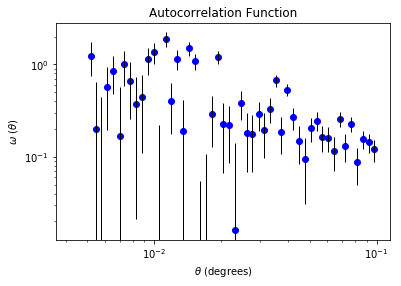

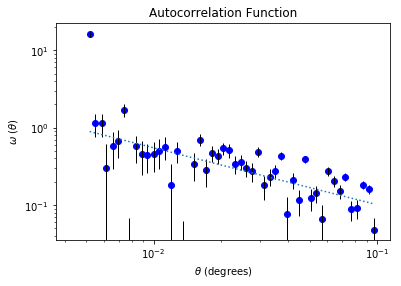

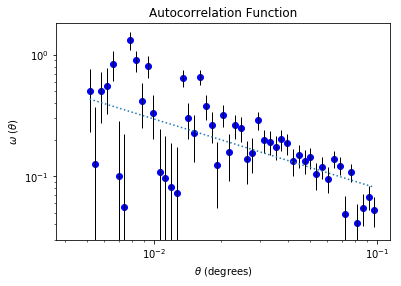

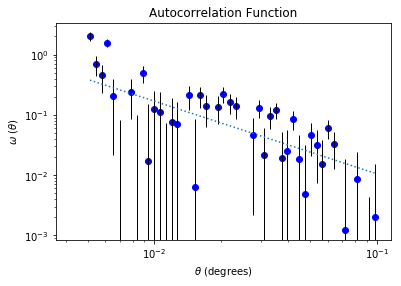

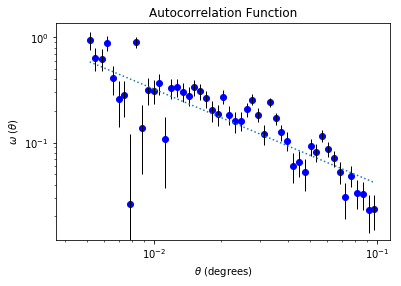

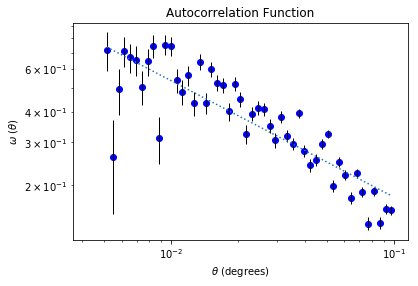

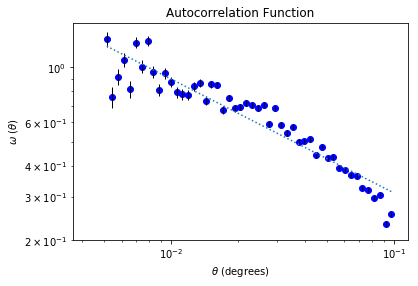

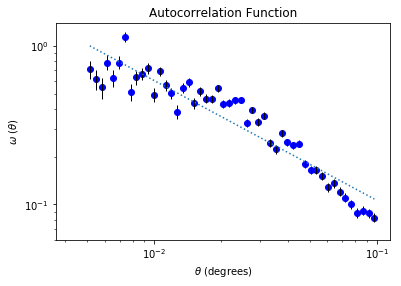

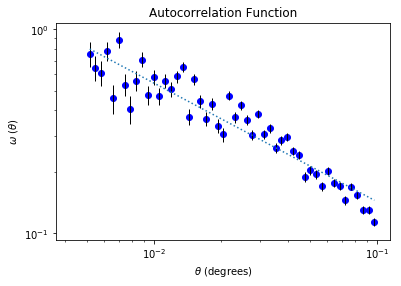

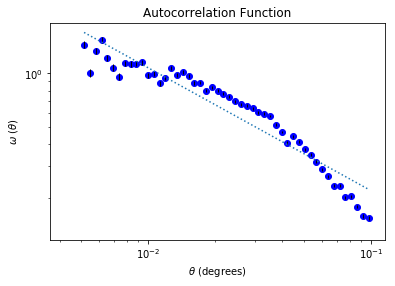

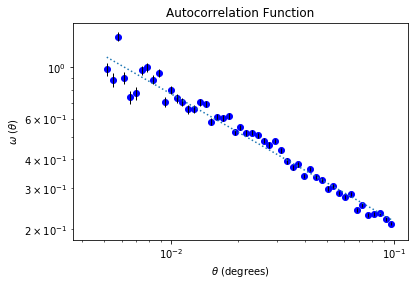

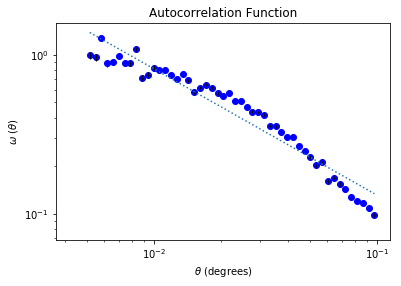

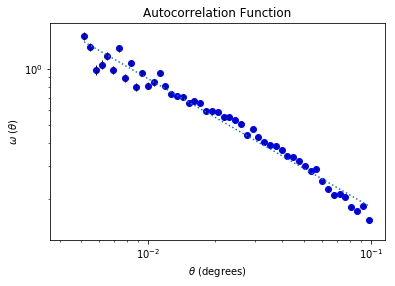

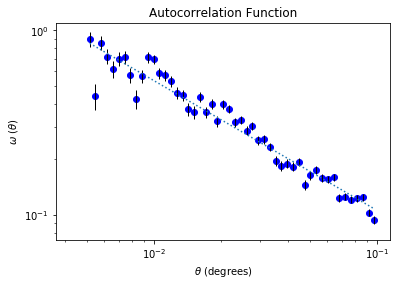

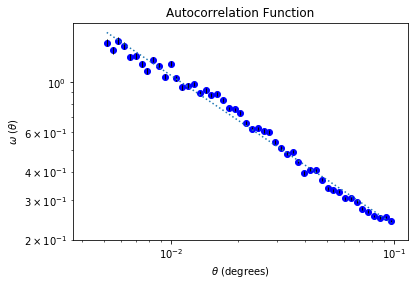

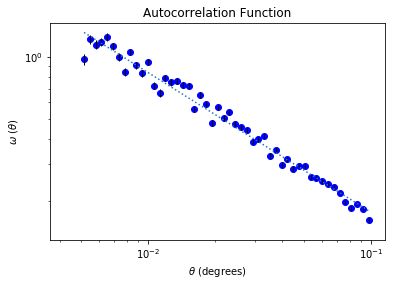

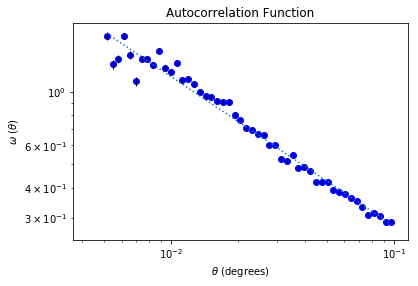

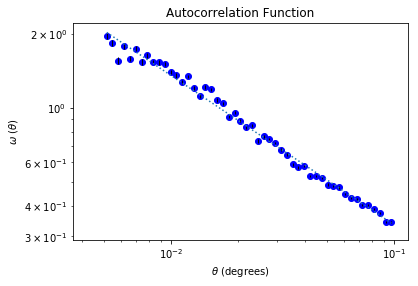

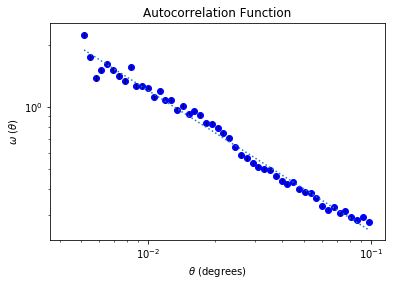

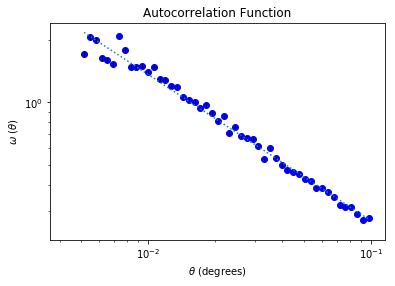

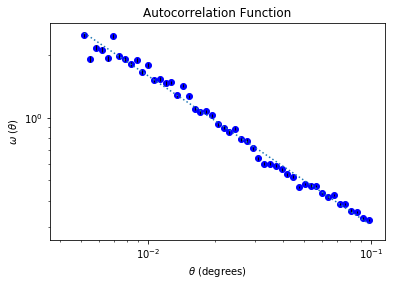

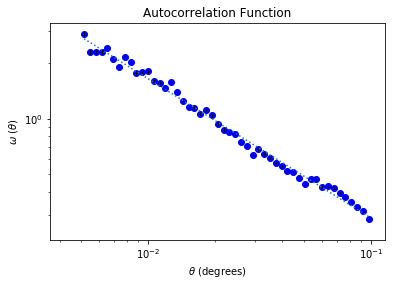

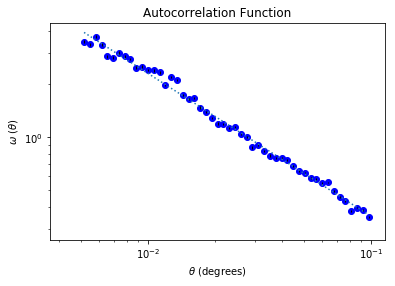

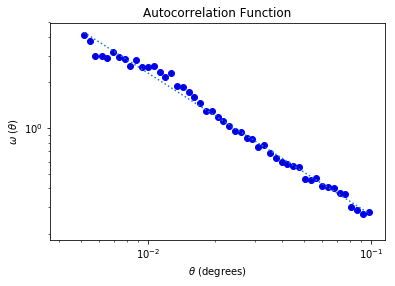

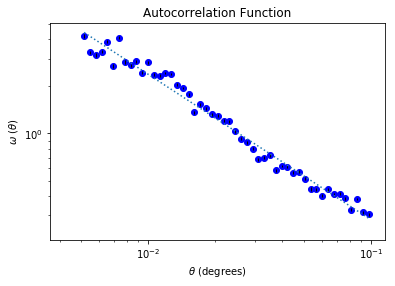

In [8]:
for num in range (0, len(r_value)-1):
    plt.plot(r_value[num], yfit_eq[num], ':')
    plt.scatter(r_value[num], xi_value[num], color='blue')
    #plt.plot (r_value[num], yfit_max[num], color = 'orange')
    #plt.plot (r_value[num], yfit_min[num], color = 'orange')
    plt.errorbar(r_value[num], xi_value[num], yerr=sig_value[num], color='black', lw=1, ls='')
    #plt.errorbar(r_value[num], -xi_value[num], yerr=sig_value[num], color='black', lw=1, ls='')
    #plt.errorbar(r_value[num], yfit_eq[num], yerr= g_err[num], color='black')
    plt.xscale('log')
    plt.yscale('log', nonposy='clip')
    plt.xlabel(r'$\theta$ (degrees)')
    plt.ylabel(r'$\omega$ ($\theta$)')
    plt.title ('Autocorrelation Function')
    plt.show()

/home/federico/anaconda3/lib/python3.6/site-packages/matplotlib/scale.py:111: RuntimeWarning:

invalid value encountered in less_equal



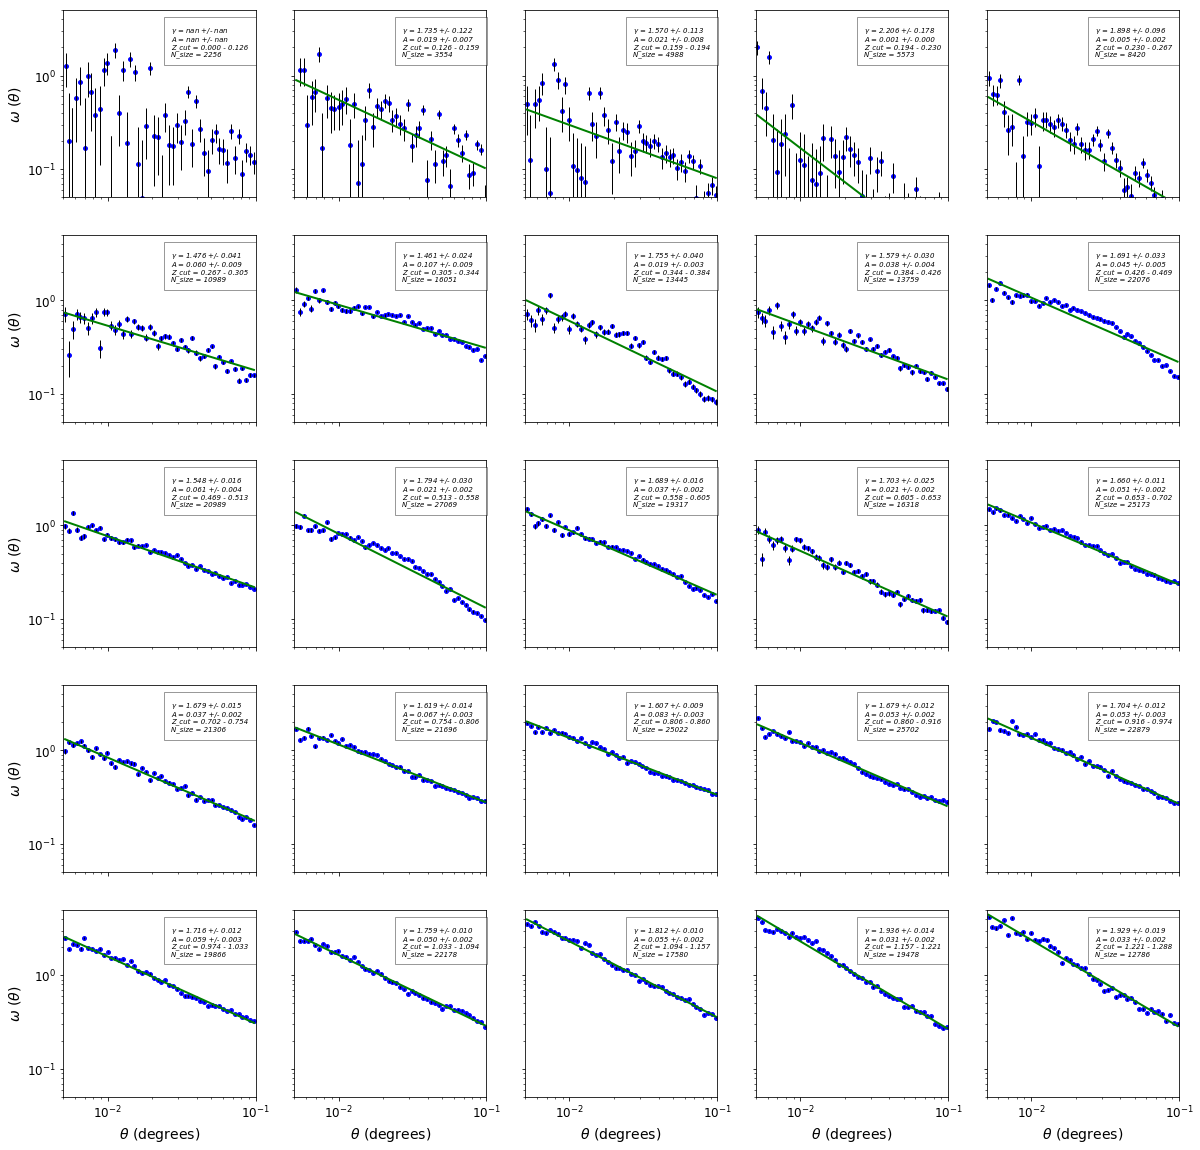

In [9]:
fig, ax = plt.subplots(5, 5, sharex=True, sharey=True, figsize = (20,20))
rep = []
for i in range(5):
    rep.append (5*i)
    for j in range(5):
        ax[i, j].plot(r_value[rep[i] + j], yfit_eq[rep[i] + j], color = 'green', lw = 2)
        ax[i,j].scatter(r_value[rep[i] + j], xi_value[rep[i] + j], color='blue', s = 15)
        ax[i,j].scatter(r_value[rep[i] + j], -xi_value[rep[i] + j], color='blue', s = 15)
        ax[i,j].errorbar(r_value[rep[i] + j], xi_value[rep[i] + j], yerr = sig_value[rep[i] + j], color='black', lw=1, ls='')
        ax[i,j].errorbar(r_value[rep[i] + j], -xi_value[rep[i] + j], yerr= sig_value[rep[i] + j], color='black', lw=1, ls='')                 
        ax[4,j].set_xlabel(r'$\theta$ (degrees)', fontsize= 14)
        ax[i,0].set_ylabel(r'$\omega$ ($\theta$)', fontsize = 14)
        ax[i,j].set_xscale('log')
        ax[i,j].set_yscale('log', nonposy='clip')
        ax[i,j].tick_params (axis = 'both', labelsize = 12)
        ax[i,j].set_xlim(0.005, 0.1)
        ax[i,j].set_ylim(0.05, 5)
        ax[i,j].text (0.027,1.65, r'$\gamma$ = %.3f' % (g_value[rep[i] + j]) + ' +/- %.3f' %(g_err[rep[i] + j])
          + '\n' + r'A = %.3f' % (A_value[rep[i] + j]) + ' +/- %.3f' %(A_err[rep[i] + j])
          + '\n' + r'Z_cut = %.3f' % (z_min[rep[i] + j]) + ' - %.3f' % (z_max[rep[i] + j])
          + '\n' + 'N_size = ' + (N_size[rep[i] + j]),
          #+ '\n' + 'X/ndof = %.3f' %(chisqr[rep[i] + j]) 
          style='italic', fontsize = 7, bbox={'facecolor':'white', 'alpha':0.4, 'pad':7})
fig.savefig('picss.png')

/home/federico/anaconda3/lib/python3.6/site-packages/matplotlib/scale.py:111: RuntimeWarning:

invalid value encountered in less_equal



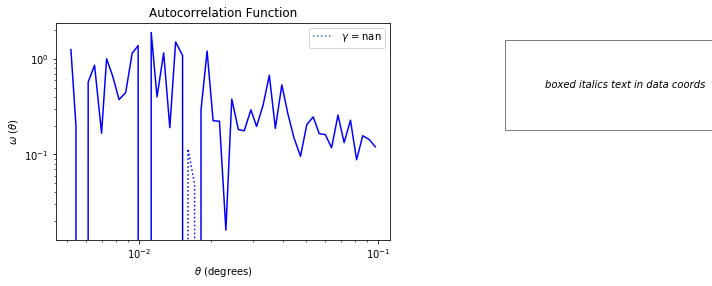

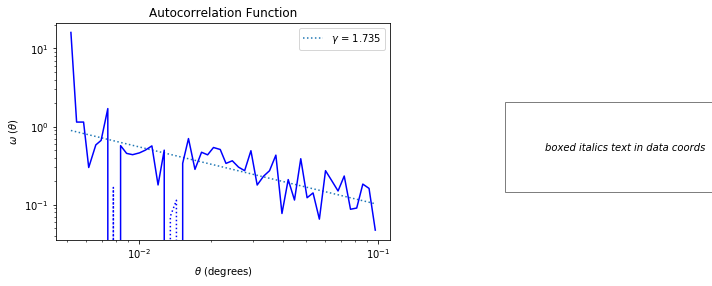

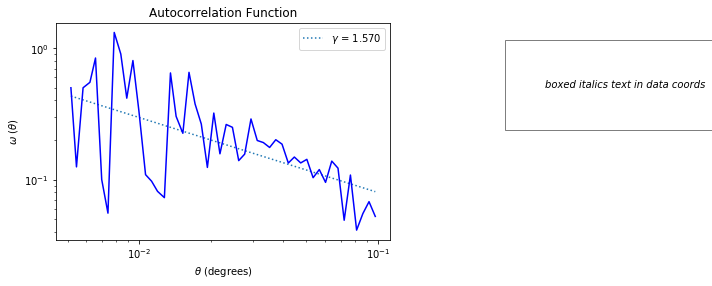

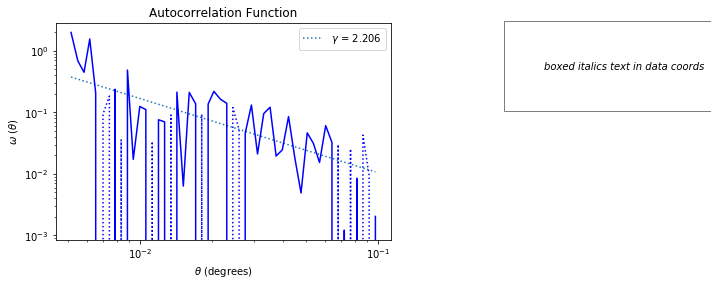

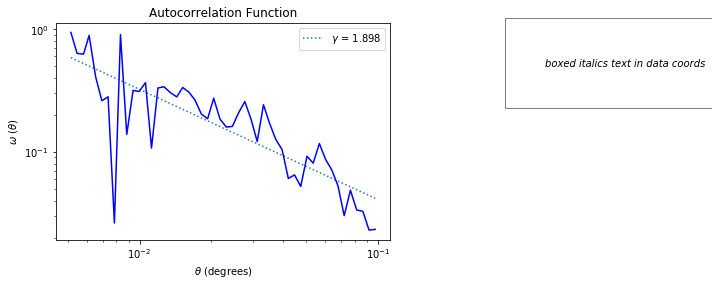

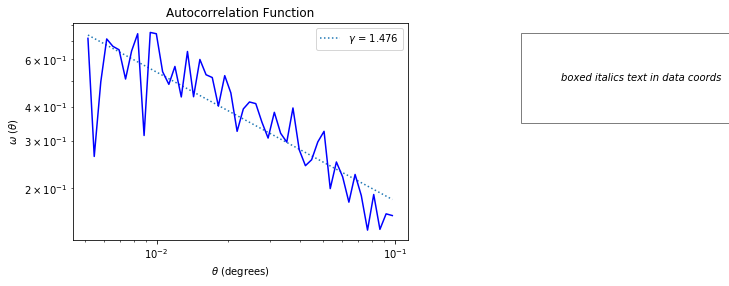

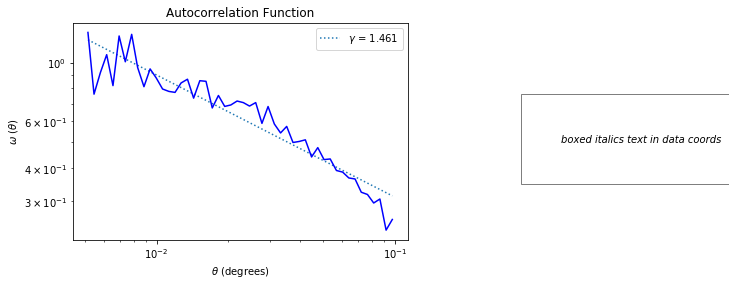

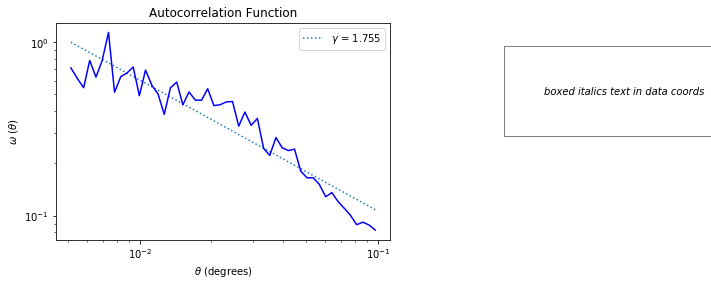

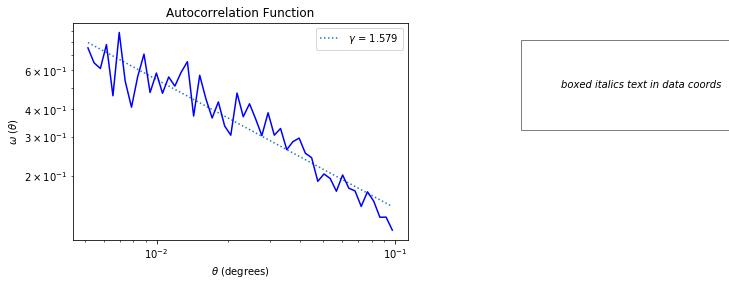

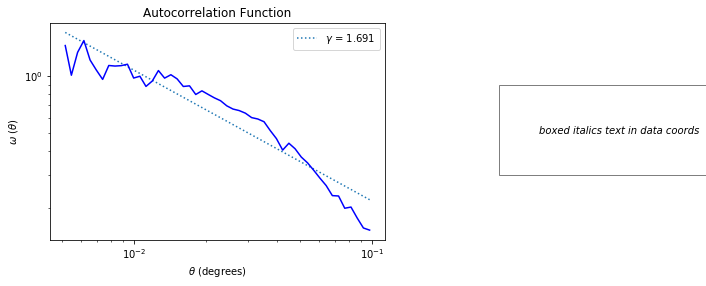

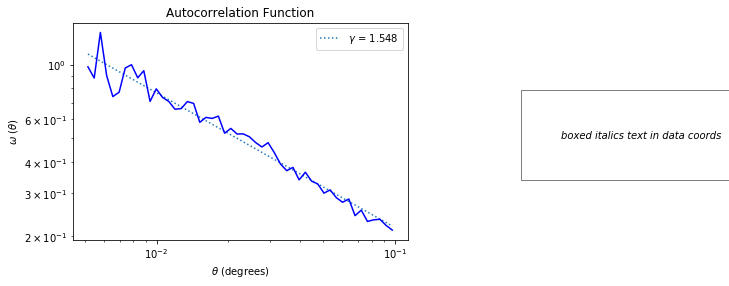

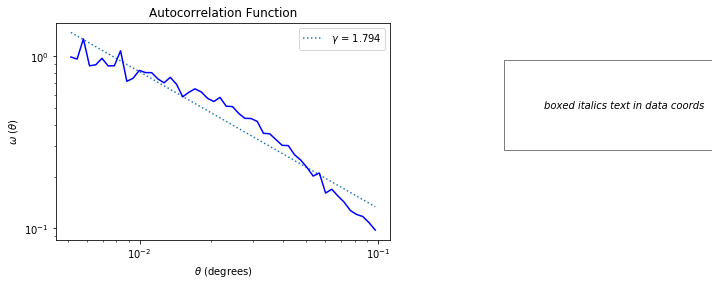

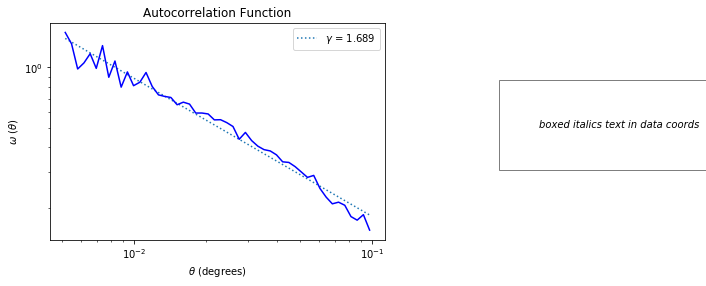

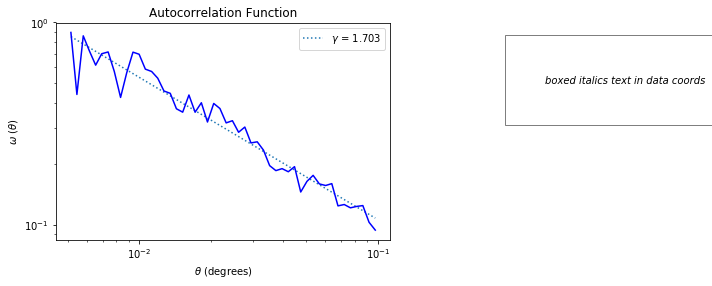

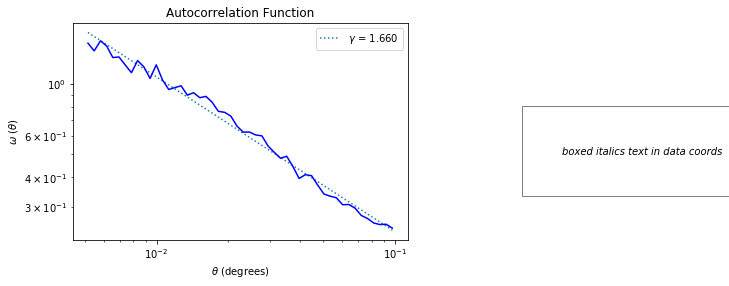

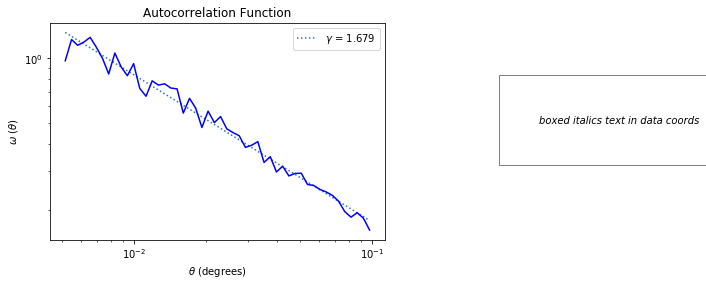

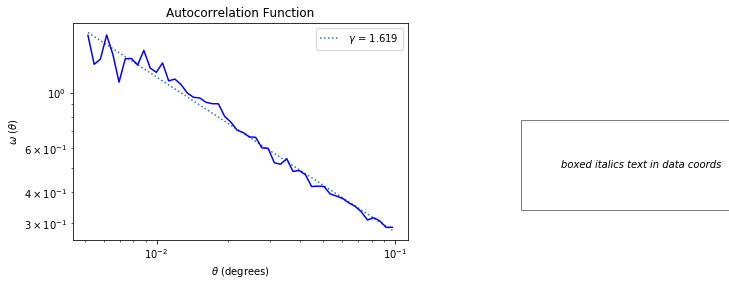

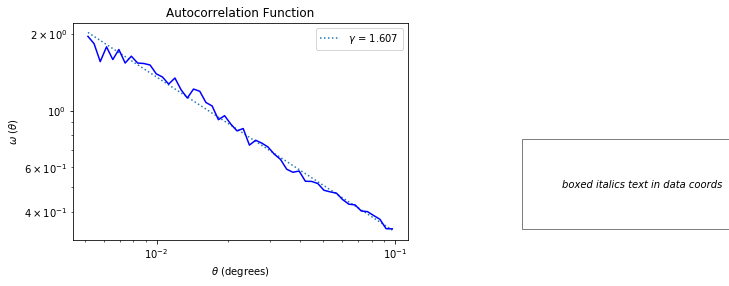

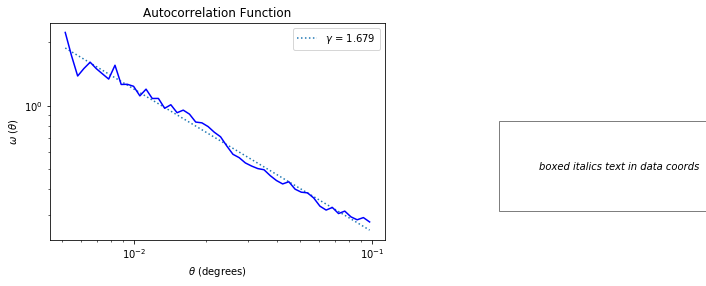

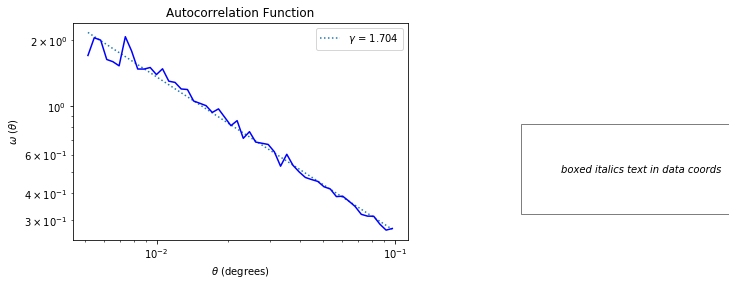

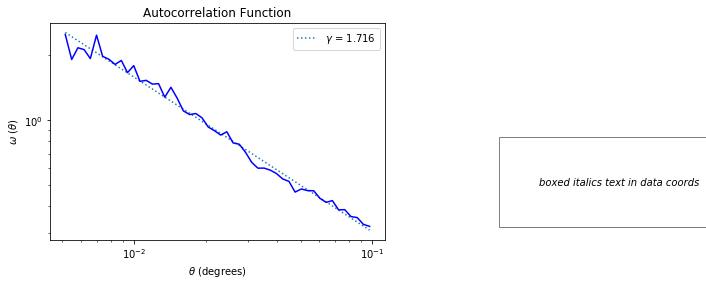

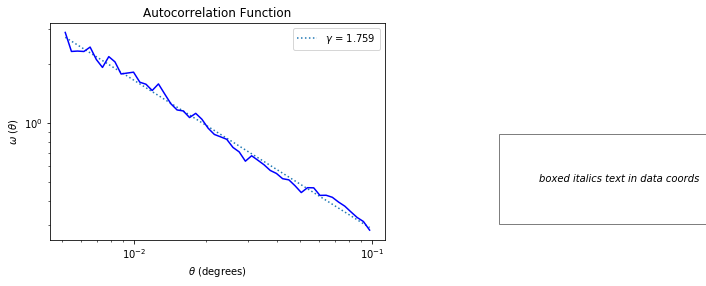

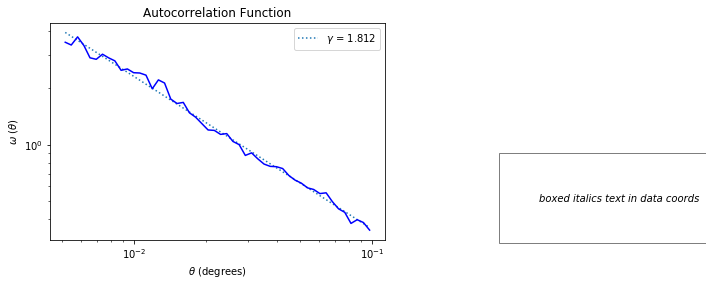

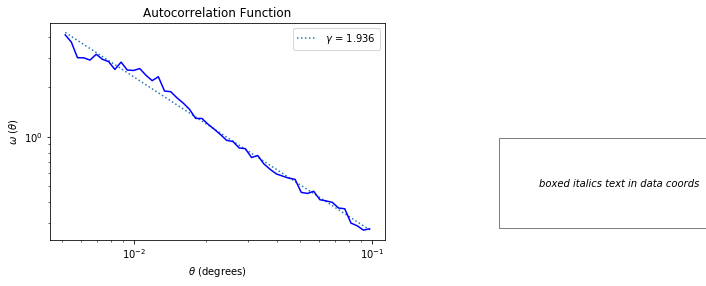

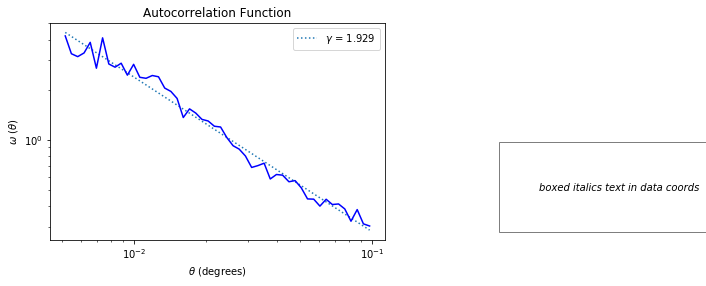

In [10]:
for num in range (0, len(r_value)-1):
    plt.plot(r_value[num], yfit_eq[num], ':')
    plt.plot(r_value[num], xi_value[num], color='blue')
    plt.plot(r_value[num], -xi_value[num], color='blue', ls=':')
    #plt.errorbar(r[xi>0], xi[xi>0], yerr=sig[xi>0], color='black', lw=1, ls='')
    #plt.errorbar(r[xi<0], -xi[xi<0], yerr=sig[xi<0], color='black', lw=1, ls='')
    #leg = plt.errorbar(-r, xi, yerr=sig, color='black')
    plt.xscale('log')
    plt.yscale('log', nonposy='clip')
    plt.xlabel(r'$\theta$ (degrees)')
    plt.ylabel(r'$\omega$ ($\theta$)')
    plt.title ('Autocorrelation Function')
    plt.legend([r'$\gamma$ = %.3f' % (g_value[num])], loc = 'upper right')
    plt.text(0.5, 0.5, 'boxed italics text in data coords', style='italic', bbox={'facecolor':'white', 'alpha':0.5, 'pad':40})           
    plt.show()

In [59]:
print(len(r_value[3]))
print (len(yfit_max[7]))

50
50


In [11]:
z_med = []
z_dif = []
z_difex = []
z_medex = []
for z in range(0, len(z_min)):
    zmed = (z_min[z] + z_max[z])/2
    zdif = (z_max[z] - z_min[z])/2
    z_med.append(zmed)
    z_dif.append(zdif)
for zmint in range (0, len(z_mintmin)):
    zmedex = (z_mintmin[zmint] + z_mintmax[zmint])/2
    zdifex = (z_mintmax[zmint] - z_mintmin[zmint])/2
    z_medex.append(zmedex)
    z_difex.append(zdifex)
print ((z_medex))

[0.015, 0.045450000000000004, 0.0768135, 0.1091175, 0.142391, 0.17666300000000001, 0.2119625, 0.2483215, 0.2857715, 0.32434450000000004, 0.36407449999999997, 0.4049965, 0.4471465, 0.49056099999999997, 0.5352779999999999, 0.5813364999999999, 0.6287765, 0.67764, 0.7279694999999999, 0.7798085, 0.8332025000000001, 0.8881985, 0.9448445, 1.00319, 1.0632855, 1.125184, 1.18894, 1.2546080000000002, 1.322246]


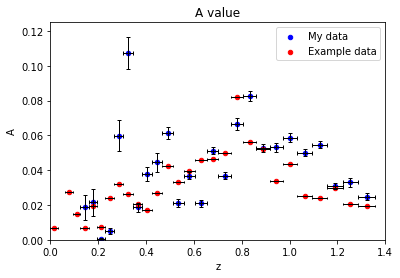

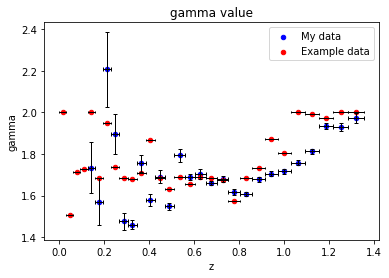

In [13]:
my_data = plt.scatter (z_med, A_value, color = 'blue', s = 20)
ex_data = plt.scatter (z_medex, A_ex, color = 'red', s = 20)
plt.errorbar (z_med, A_value, yerr = A_err, xerr = z_dif,  color='black', lw=1, ls='', capsize = 2)
plt.errorbar (z_medex, A_ex, xerr = z_difex,  color='black', lw=1, ls='', capsize = 1)
plt.xlim([0,1.4])
plt.ylim ([0,0.125])
plt.xlabel('z')
plt.ylabel('A')
plt.legend([my_data, ex_data], ['My data', 'Example data'])
plt.title ('A value')
plt.show()
my_data = plt.scatter (z_med, g_value, color = 'blue', s = 20)
ex_data = plt.scatter (z_medex, g_ex, color = 'red', s = 20)
plt.errorbar (z_med, g_value, yerr = g_err, xerr = z_dif,  color='black', lw=1, ls='', capsize = 2)
plt.errorbar (z_medex, g_ex, xerr = z_difex,  color='black', lw=1, ls='', capsize = 1)
plt.xlabel('z')
plt.ylabel('gamma')
plt.legend([my_data, ex_data], ['My data', 'Example data'])
plt.title ('gamma value')
plt.show()


In [14]:
A_tresh = []
A_ntresh = []
for tresh in range (0, len(A_value)):
    Atresh = A_value[tresh] + A_err[tresh]
    Antresh = A_value[tresh] - A_err[tresh]
    A_tresh.append (Atresh)
    A_ntresh.append (Antresh)

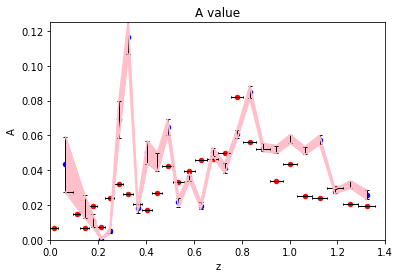

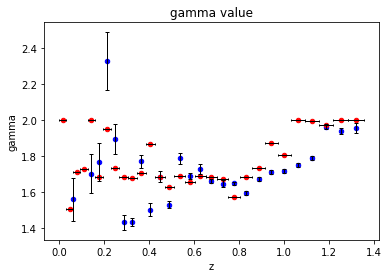

In [33]:
plt.scatter (z_med, A_value, color = 'blue', s = 20)
plt.scatter (z_medex, A_ex, color = 'red', s = 20)
plt.errorbar (z_med, A_value, yerr = A_err,  color='black', lw=1, ls='', capsize = 2)
plt.errorbar (z_medex, A_ex, xerr = z_difex,  color='black', lw=1, ls='', capsize = 1)
plt. plot(z_med, A_tresh, color = 'pink')
plt.plot (z_med, A_ntresh, color = 'pink')
plt.fill_between (z_med, A_tresh, A_ntresh, color = 'pink')
plt.xlim([0,1.4])
plt.ylim ([0,0.125])
plt.xlabel('z')
plt.ylabel('A')
plt.title ('A value')
plt.show()
plt.scatter (z_med, g_value, color = 'blue', s = 20)
plt.scatter (z_medex, g_ex, color = 'red', s = 20)
plt.errorbar (z_med, g_value, yerr = g_err,  color='black', lw=1, ls='', capsize = 2)
plt.errorbar (z_medex, g_ex, xerr = z_difex,  color='black', lw=1, ls='', capsize = 1)
plt.xlabel('z')
plt.ylabel('gamma')
plt.title ('gamma value')
plt.show()

[0.05447347 0.04822428 0.04550158 0.04311306 0.0418487  0.03834825
 0.03546635 0.03462717 0.03280894 0.03086067 0.02878368 0.02729755
 0.02552383 0.0238298  0.02257618 0.02118568 0.01984189 0.01892528
 0.01777795 0.01676946 0.01576613 0.01502783 0.013955   0.01307776
 0.01248635 0.01156862 0.01100964 0.01038628 0.00978232 0.00913061
 0.00867599 0.00826983 0.00768254 0.00726951 0.00683874 0.0064321
 0.00608637 0.00575874 0.0053914  0.00507366 0.00477073 0.0045285
 0.00426053 0.00401538 0.00377954 0.00356278 0.00336219 0.00316845
 0.00298627 0.00281829]


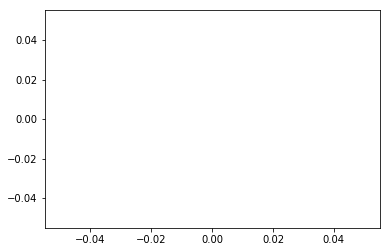

50


[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan]
